In [43]:
# Part 1 - Imports

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE


In [44]:
# Part 2 -  Paths to the datasets, Load the datasets & Combine the datasets
file_paths = [
    'peugeot_207_01.csv',
    'peugeot_207_02.csv',
    'opel_corsa_01.csv',
    'opel_corsa_02.csv'
]

combined_df = pd.DataFrame()

for file_path in file_paths:
    # Load each dataset
    df_temp = pd.read_csv(file_path, delimiter=';')
    # Combine the datasets
    combined_df = pd.concat([combined_df, df_temp], ignore_index=True)

# Print the combined dataset to show that it has been successfully combined
print("Combined Dataset Overview:")
print(combined_df.head())  # Display the first few rows of the combined dataset
print("\nCombined Dataset Shape:", combined_df.shape)  # Display the shape of the combined dataset



Combined Dataset Overview:
   Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
0          59         -13.399994                  20.699999   
1          60         -13.200005                  17.100000   
2          61         -13.200005                  14.400000   
3          62         -11.800003                  14.400000   
4          63         -19.800003                  14.400000   

   VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
0                6.060            115.840061              -4.500000   
1                6.345            117.200816              -3.599998   
2                6.585            117.559595              -2.700001   
3                6.825            117.801222               0.000000   
4                7.065            117.925697               0.000000   

   LongitudinalAcceleration  EngineLoad  EngineCoolantTemperature  \
0                    1.0548   38.039215                      31.0   
1                    0.9012  

In [45]:
# Part 3 - Clean the dataset and Encode the 'traffic' column using LabelEncoder and Display the first few rows of the cleaned dataset and the encoding

# Drop rows with missing values
combined_df_cleaned = combined_df.dropna().copy()

# Encode the 'traffic' column
le = LabelEncoder()
combined_df_cleaned['traffic_encoded'] = le.fit_transform(combined_df_cleaned['traffic'])

# Select features and target variable
features = combined_df_cleaned.columns.drop(['Unnamed: 0', 'traffic', 'traffic_encoded', 'drivingStyle', 'roadSurface'])
X_combined = combined_df_cleaned[features]
y_combined = combined_df_cleaned['traffic_encoded']

# Display the first few rows of the cleaned dataset and the encoding
combined_df_cleaned[['traffic', 'traffic_encoded']].head(), le.classes_


(                  traffic  traffic_encoded
 0  LowCongestionCondition                1
 1  LowCongestionCondition                1
 2  LowCongestionCondition                1
 3  LowCongestionCondition                1
 4  LowCongestionCondition                1,
 array(['HighCongestionCondition', 'LowCongestionCondition',
        'NormalCongestionCondition'], dtype=object))

In [46]:

# Part 4- Split the dataset into training and testing sets, Apply feature scaling and Balance the dataset using SMOTE
# Apply feature scaling
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_combined_scaled, y_combined)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets to confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42616, 14), (10655, 14), (42616,), (10655,))

In [47]:
# Part 5 - Initialize and train the Logistic Regression model, Make predictions and evaluate the model

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
svm

# Make predictions and evaluate the model
predictions = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions, target_names=le.classes_)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.6373533552322853
Classification Report:
                           precision    recall  f1-score   support

  HighCongestionCondition       0.67      0.78      0.72      3590
   LowCongestionCondition       0.67      0.60      0.63      3533
NormalCongestionCondition       0.56      0.53      0.55      3532

                 accuracy                           0.64     10655
                macro avg       0.64      0.64      0.63     10655
             weighted avg       0.64      0.64      0.63     10655



c:\Users\User\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

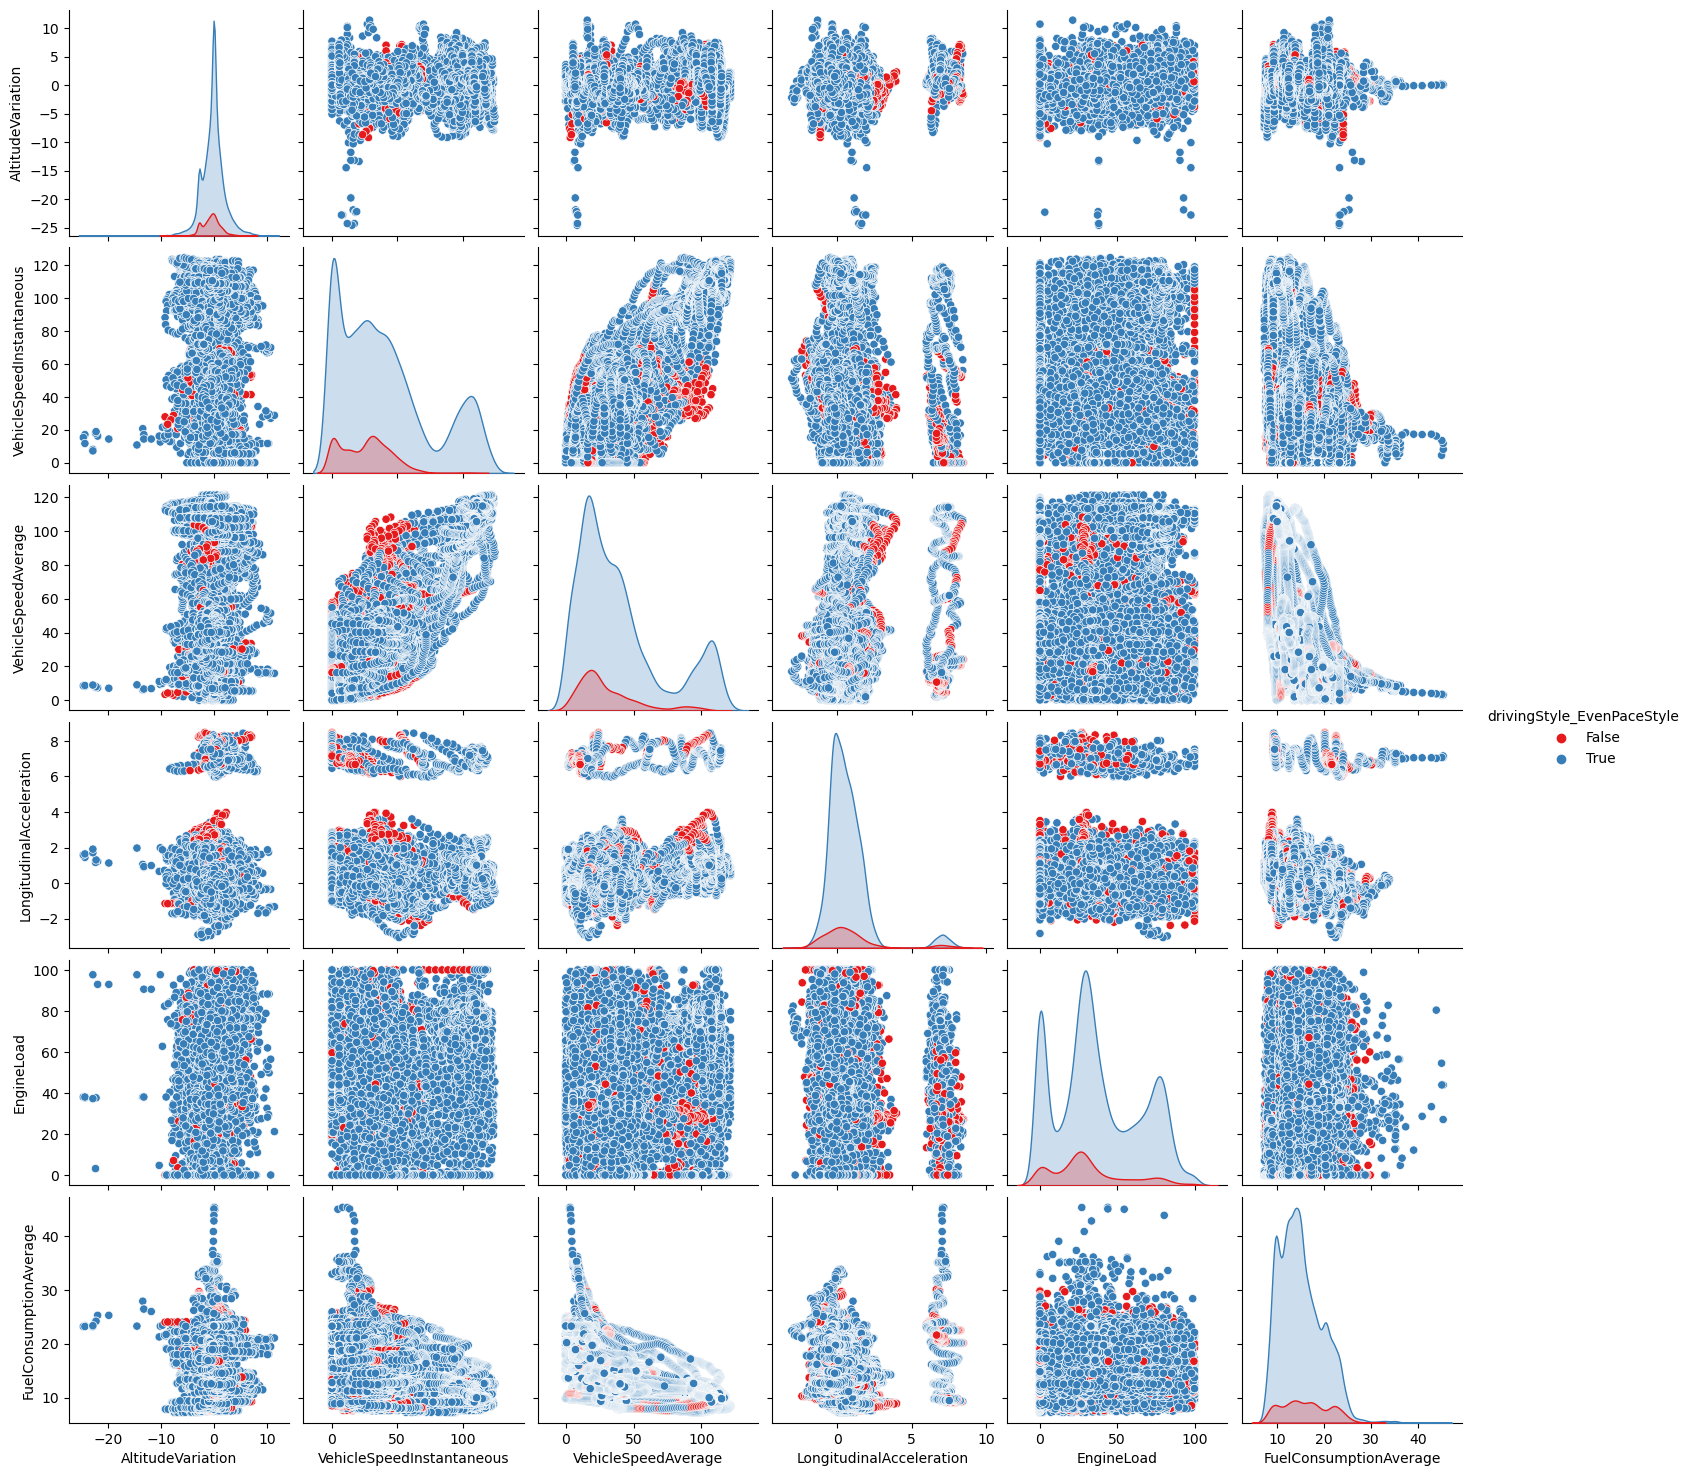

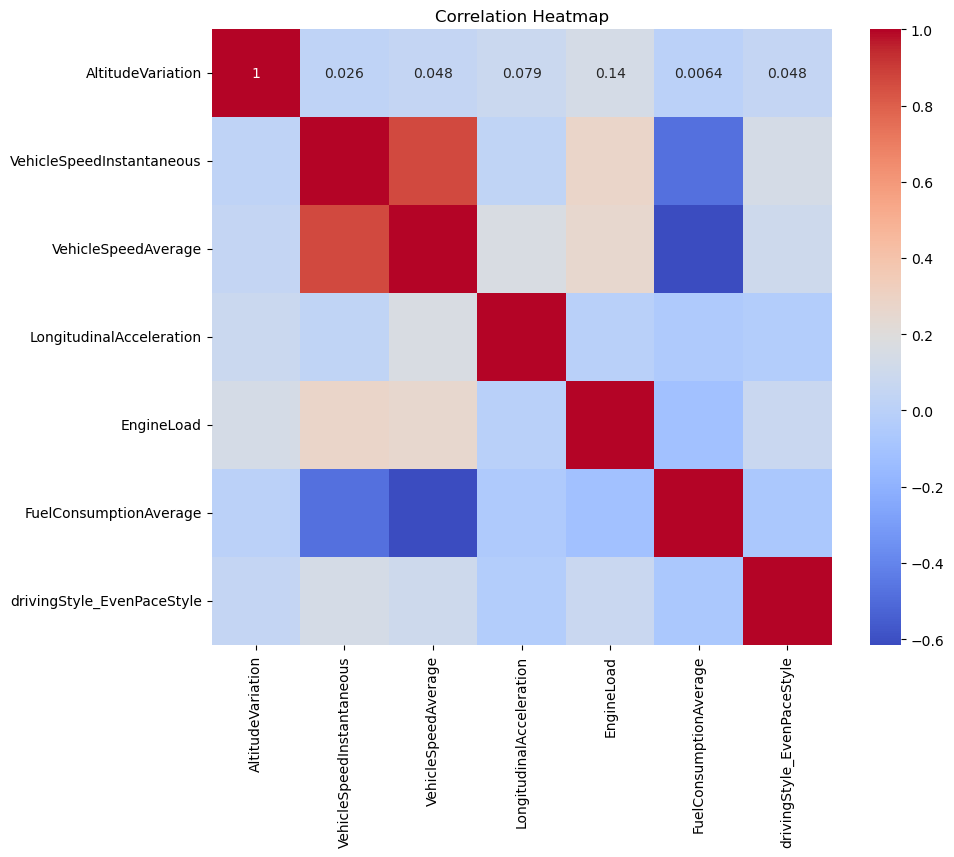

NameError: name 'knnn_model' is not defined

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the datasets
opel_corsa_01 = pd.read_csv('opel_corsa_01.csv', sep=';', decimal=',', na_values='?', engine='python')
opel_corsa_02 = pd.read_csv('opel_corsa_02.csv', sep=';', decimal=',', na_values='?', engine='python')
peugeot_207_01 = pd.read_csv('peugeot_207_01.csv', sep=';', decimal=',', na_values='?', engine='python')
peugeot_207_02 = pd.read_csv('peugeot_207_02.csv', sep=';', decimal=',', na_values='?', engine='python')

# Combine and clean the datasets
all_vehicles_combined = pd.concat([opel_corsa_01, opel_corsa_02, peugeot_207_01, peugeot_207_02], ignore_index=True).dropna()

# Encode categorical variables
categorical_columns = ['roadSurface', 'traffic', 'drivingStyle']
all_vehicles_encoded = pd.get_dummies(all_vehicles_combined, columns=categorical_columns)

# Exploratory Data Analysis (EDA)
eda_columns = ['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage', 'LongitudinalAcceleration', 'EngineLoad', 'FuelConsumptionAverage', 'drivingStyle_EvenPaceStyle']
sns.pairplot(all_vehicles_encoded[eda_columns], hue='drivingStyle_EvenPaceStyle', palette='Set1')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(all_vehicles_encoded[eda_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data Splitting
X = all_vehicles_encoded.drop(columns=['drivingStyle_EvenPaceStyle'])
y = all_vehicles_encoded['drivingStyle_EvenPaceStyle']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
svm_model = SVC(kernel='linear') # Adjust parameters as needed
svm_model.fit(X_train_scaled, y_train)

logreg_model = LogisticRegression() # Adjust parameters as needed
logreg_model.fit(X_train_scaled, y_train)

knn_model = KNeighborsClassifier(n_neighbors=3) # Adjust the number of neighbors as needed
knn_model.fit(X_train_scaled, y_train)

# Model Evaluation
for model in [svm_model, logreg_model, knnn_model]:
    y_pred = model.predict(X_test_scaled)
    print(f"Model: {model.__class__.__name__}")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("-----------\n")
